# Iris Unsupervised ML Project

## Project Overview

Clustering Analysis of Iris Dataset Using K-means and DBSCAN

The Iris flower dataset is one of the most famous datasets used for machine learning, especially for those just starting with data science. It includes measurements for various flower features and has been used historically to demonstrate the capabilities of different clustering and classification algorithms.

### Author

Grant Novota

### Problem Description

Clustering is a type of unsupervised learning that is widely used for statistical data analysis in many fields. Unlike classification, clustering techniques organize a set of data items into related groups without prior knowledge of the group definitions. In the case of the Iris dataset, though the labels are available, we will ignore them to simulate a real-world scenario where unsupervised learning is necessary. This approach allows us to explore how well clustering algorithms can identify relationships and groupings in the data based solely on the input features.

### Goal

The primary goal of this analysis is to apply and compare two different clustering algorithms, K-means and DBSCAN, to the Iris dataset to:

* Identify the optimal number of clusters and assess the cluster quality using the Silhouette Score.
* Understand the characteristics of each cluster formed by these algorithms.
* Evaluate the effectiveness of each algorithm in uncovering meaningful patterns and groupings in the data without prior knowledge of the flower species.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Let's start by importing the data, which can be done importing a python library, and exploring the basic structure of the features. Then check for any missing values explicitly.

In [4]:
# Load dataset
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Show the first few rows of the data
data.head()

# Check for missing values
print(data.isnull().sum())

# Output statistics
print(data.describe())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800

## Exploratory Data Analysis (EDA)

### Histograms and Distributions
Used to give a good sense of the distribution of each feature.

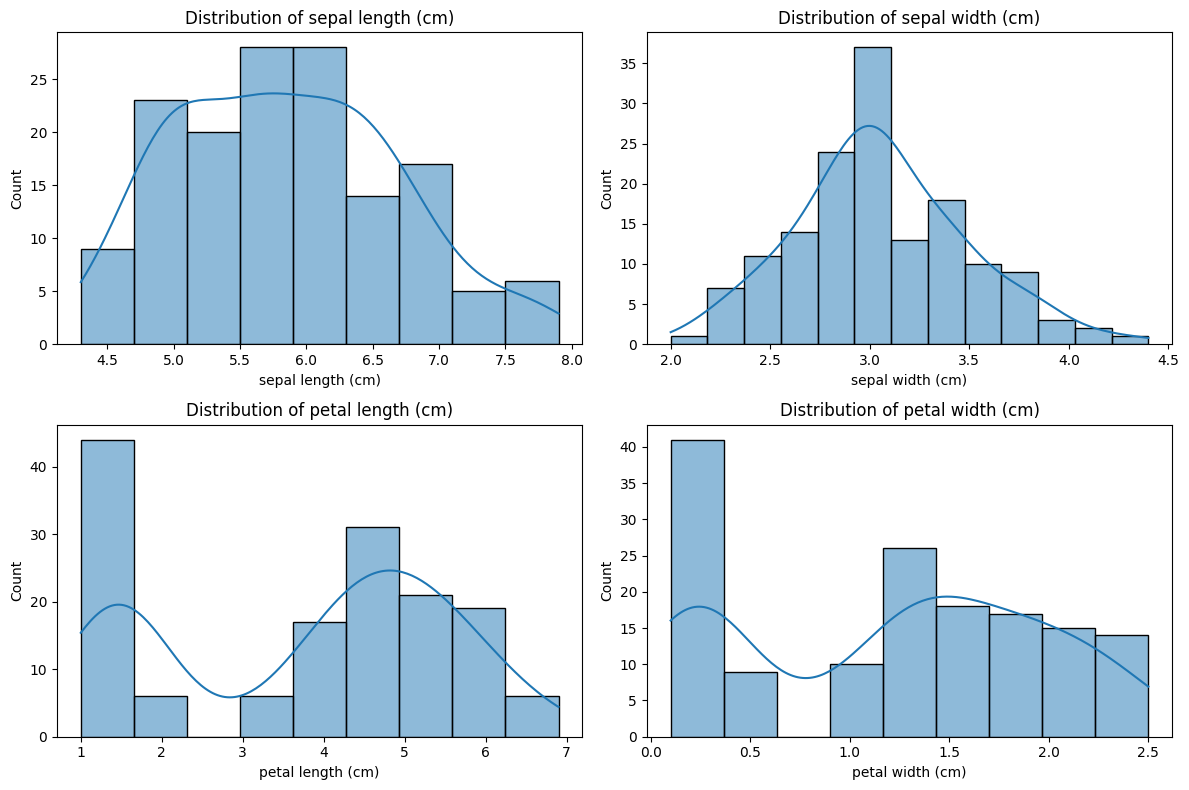

In [5]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw a histogram for each numerical attribute
for i, feature in enumerate(data.columns[:-1]):
    plt.subplot(2, 2, i + 1)  # 2 rows, 2 columns
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

### Pair Plot
To help visualize pairwise relationships and the distribution of each variable, facilitating the spotting of clusters visually.

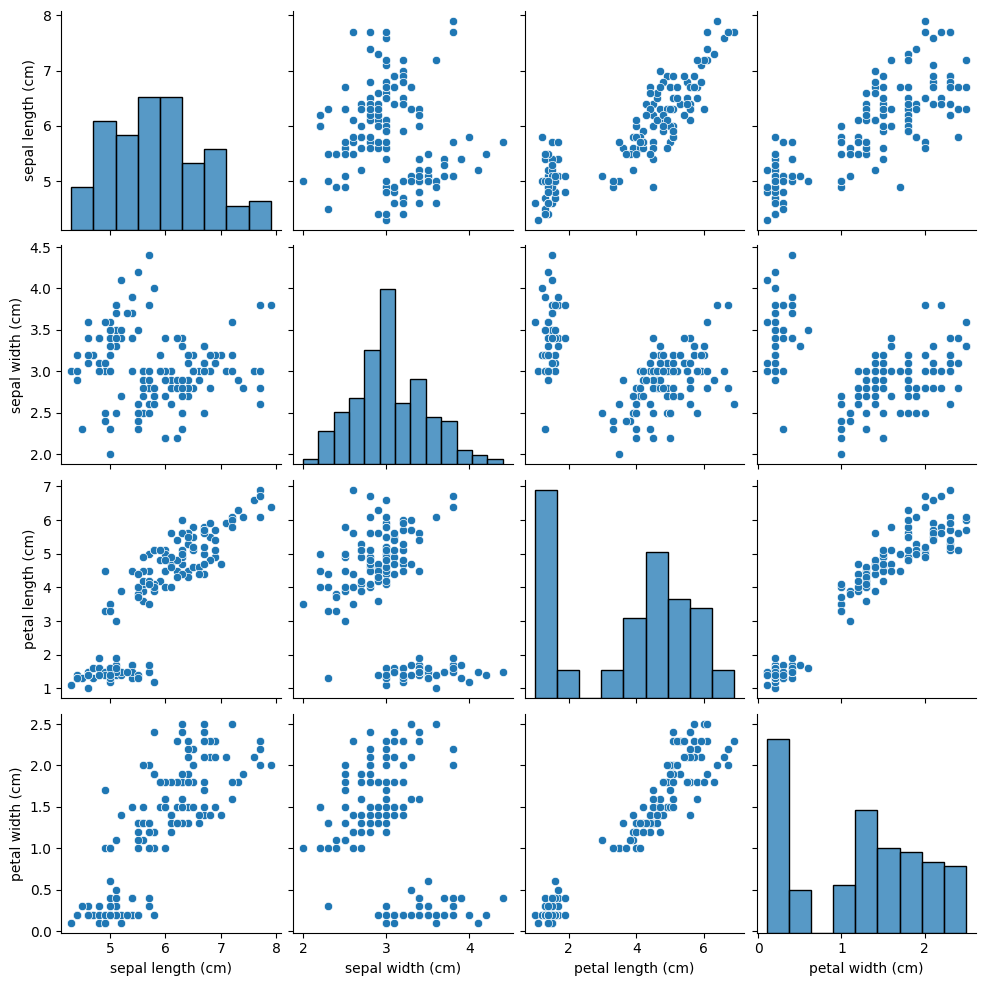

In [6]:
# Pairplot to explore the relationships between features
sns.pairplot(data.drop('target', axis=1))
plt.show()

### Correlation Heatmap
A heatmap of the correlation matrix to highlight how features correlate with one another.

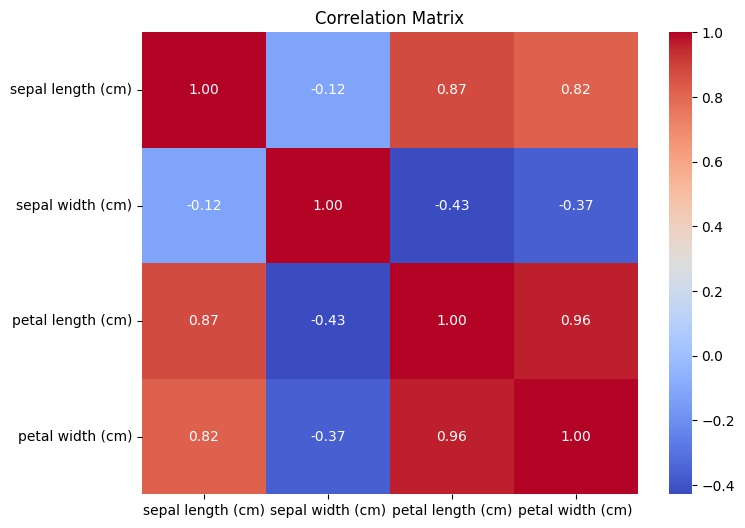

In [7]:
# Compute the correlation matrix
corr = data.drop('target', axis=1).corr()

# Generate a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

## Preparing Data for Clustering
Given the statistics, we can see variatings in the scale of different features, suggesting that standardization might be beneficial to ensure that one feature does not dominate the clstering process purely due to its scale.

We'll use standardization to scale the features to have a mean of 0 and a standard deviation of 1. This process is important because K-means clustering is sensitive to the scales of the data points and can be biased towards higher magnitude variables.

In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Drop the target column for clustering as it's unsupervised learning
features = data.drop('target', axis=1)

# Standardize the features
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a dataframe
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first few rows of the processed data
scaled_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [3]:
# Impute missing values using the median
X['ca'].fillna(X['ca'].median(), inplace=True)
X['thal'].fillna(X['thal'].median(), inplace=True)

# Check again for missing values to confirm
print("\nMissing values after imputation:")
print(X.isnull().sum())


Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


C:\Users\gtnov\AppData\Local\Temp\ipykernel_24596\4060859806.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['ca'].fillna(X['ca'].median(), inplace=True)
C:\Users\gtnov\AppData\Local\Temp\ipykernel_24596\4060859806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ca'].fillna(X['ca'].median(), inplace=True)
C:\Users\gtnov\AppData\Lo

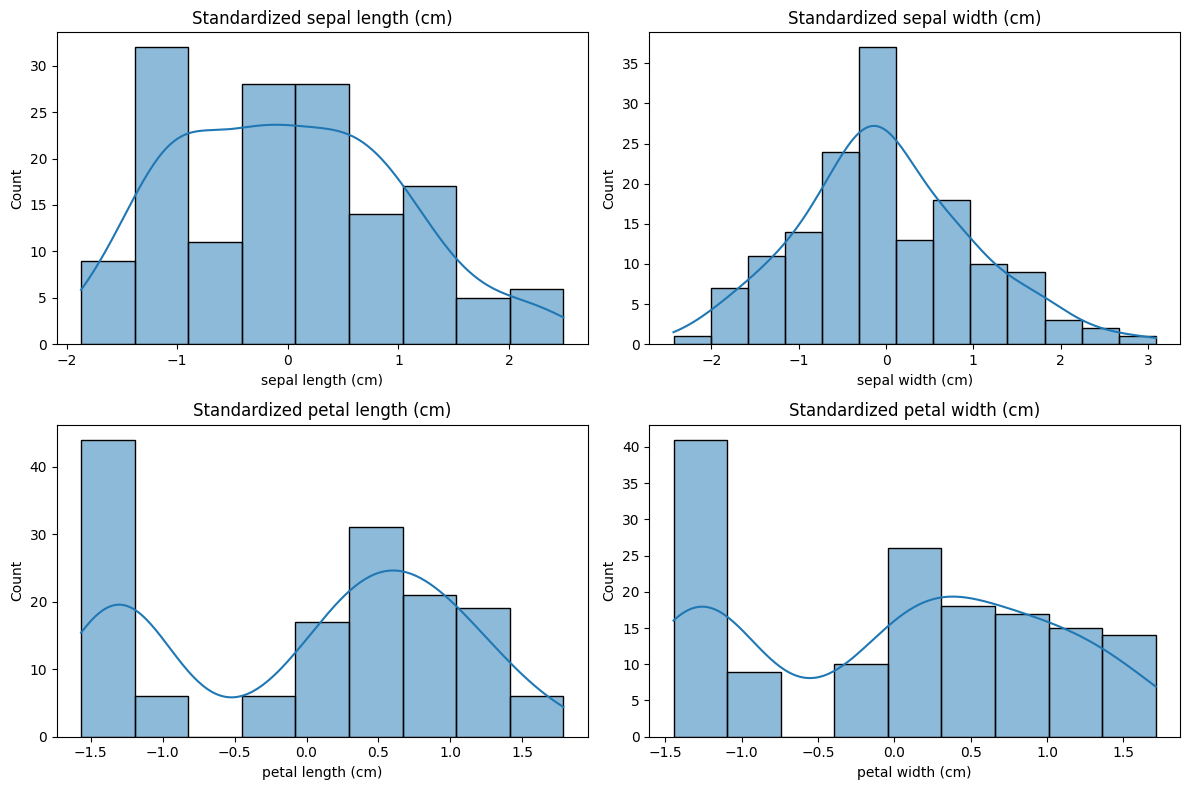

In [9]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw a histogram for each standardized feature
for i, feature in enumerate(scaled_data.columns):
    plt.subplot(2, 2, i + 1)  # 2 rows, 2 columns
    sns.histplot(scaled_data[feature], kde=True)
    plt.title(f'Standardized {feature}')

plt.tight_layout()
plt.show()

## Model Building using K-means Clustering
Let's use the Elbow method to determine the optimal number of clustesrs. This involves plotting the within-cluster sum of squares (WCSS) against the number of clusters. We look for a "knee" in the plot, where the WCSS begins to decrease more slowly.

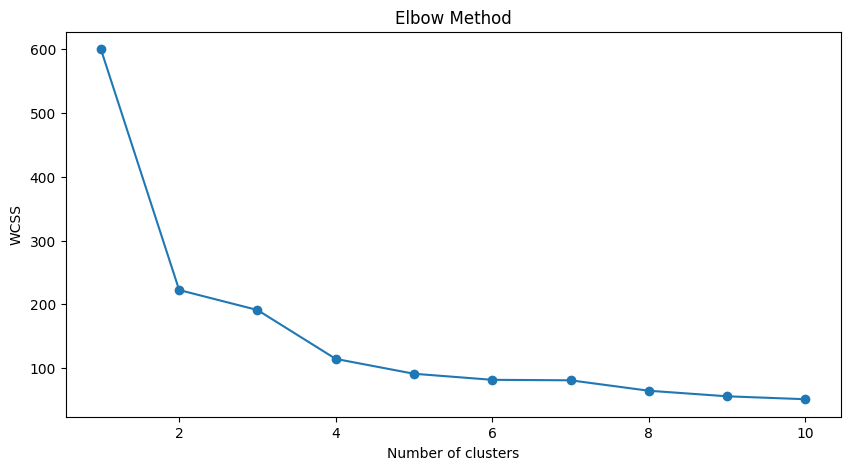

In [10]:
from sklearn.cluster import KMeans

# Calculating WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Here we see the elbow point is found at k=3. Let's set the optimal clusters to 3.

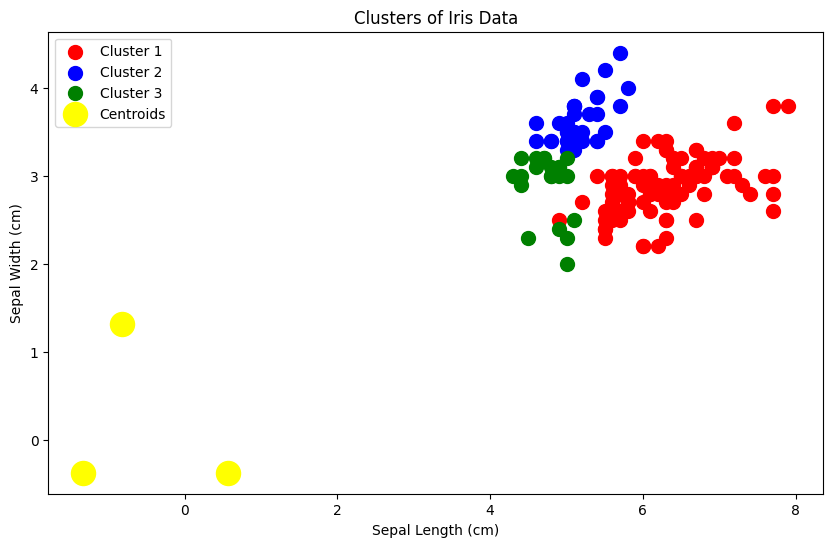

In [11]:
# Running K-means with the optimal number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Adding cluster labels to the original dataset for visualization
data['Cluster'] = cluster_labels

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['sepal length (cm)'][data.Cluster == 0], data['sepal width (cm)'][data.Cluster == 0], s=100, c='red', label ='Cluster 1')
plt.scatter(data['sepal length (cm)'][data.Cluster == 1], data['sepal width (cm)'][data.Cluster == 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(data['sepal length (cm)'][data.Cluster == 2], data['sepal width (cm)'][data.Cluster == 2], s=100, c='green', label ='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Iris Data')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

## Model Analysis
To better understand how the clusters are composed in terms of the original Iris features, let's create some visualizations and statistical summaries for each cluster.

         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                 6.314583          2.895833           4.973958   
1                 5.169697          3.630303           1.493939   
2                 4.747619          2.895238           1.757143   

         petal width (cm)    target  
Cluster                              
0                1.703125  1.520833  
1                0.272727  0.000000  
2                0.352381  0.190476  


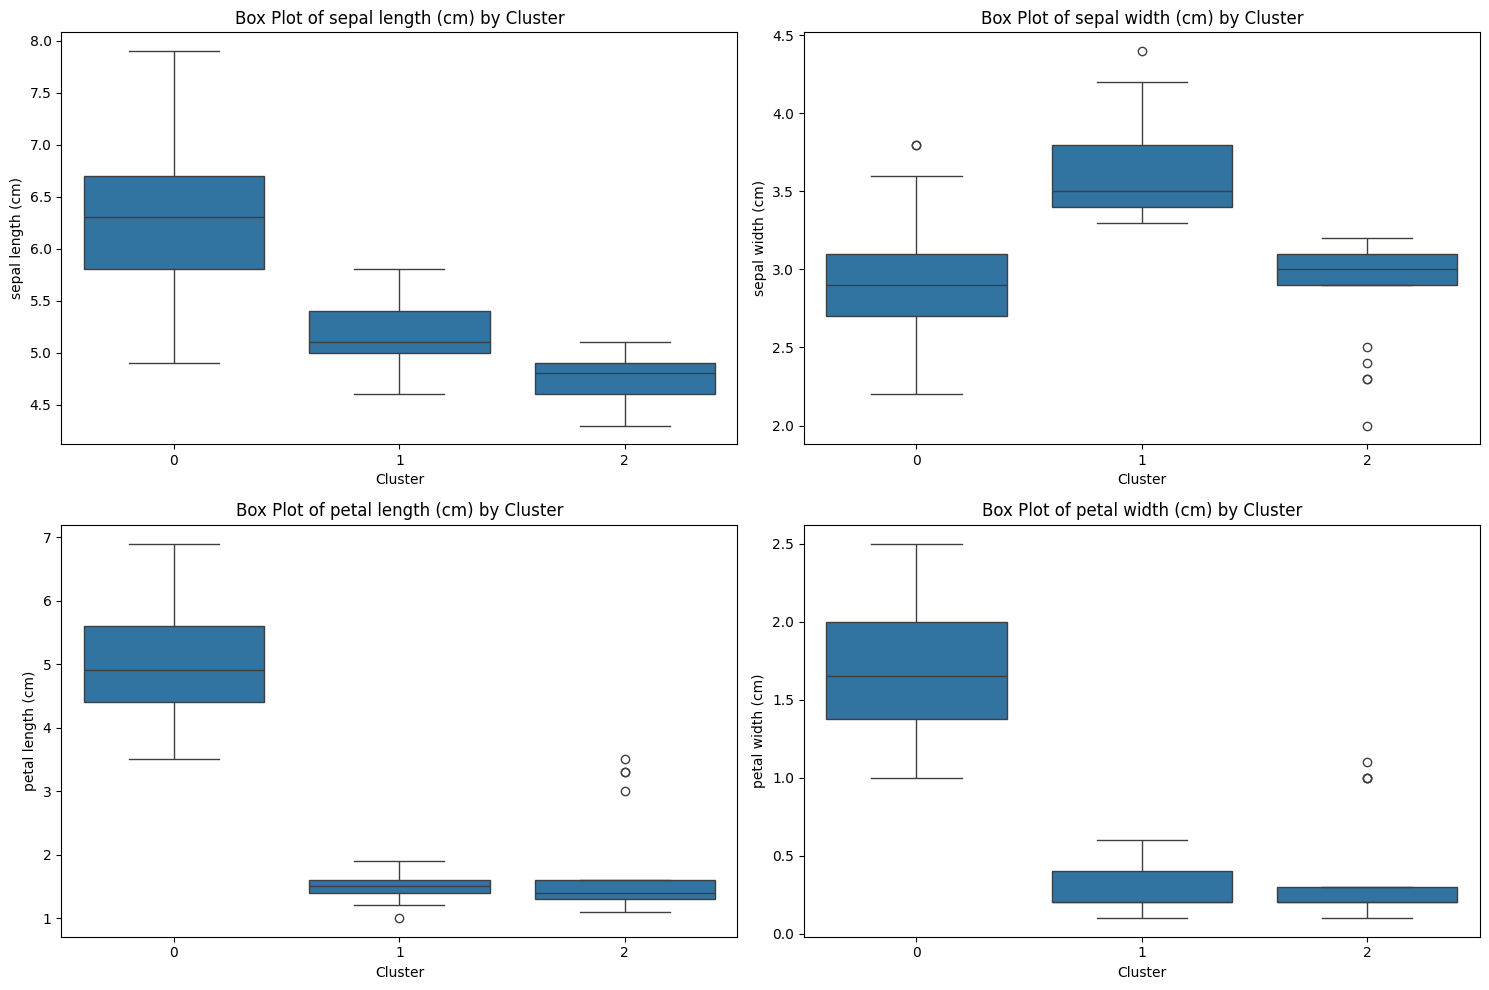

In [12]:
# Group the data by cluster
clustered_data = data.groupby('Cluster')
cluster_means = clustered_data.mean()

# Display the mean values of features for each cluster
print(cluster_means)

# Box plots for each feature by cluster
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for i, feature in enumerate(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']):
    sns.boxplot(x='Cluster', y=feature, data=data, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'Box Plot of {feature} by Cluster')

plt.tight_layout()
plt.show()

### Evaluating Cluster Quality with Silhouette Score

The Silhouette Score is a measure of how similar an object is to its own cluster compared to other clusters. The range of the Silhouette Score is from -1 to +1. A high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [13]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
score = silhouette_score(scaled_data, cluster_labels)

print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.48


A Silhouette Score of 0.48 is moderately acceptable, indicating that the clusters are reasonably well apart from each other but not distinctly separated. This score suggests there is some overlap or the clusters are not perfectly cohesive. We can try a different clustering algorithm to see if it is more effective.

### DBSCAN for Comparision
Here is a setup of DBSCAN to compare effectiveness.

New Silhouette Score with DBSCAN: 0.36


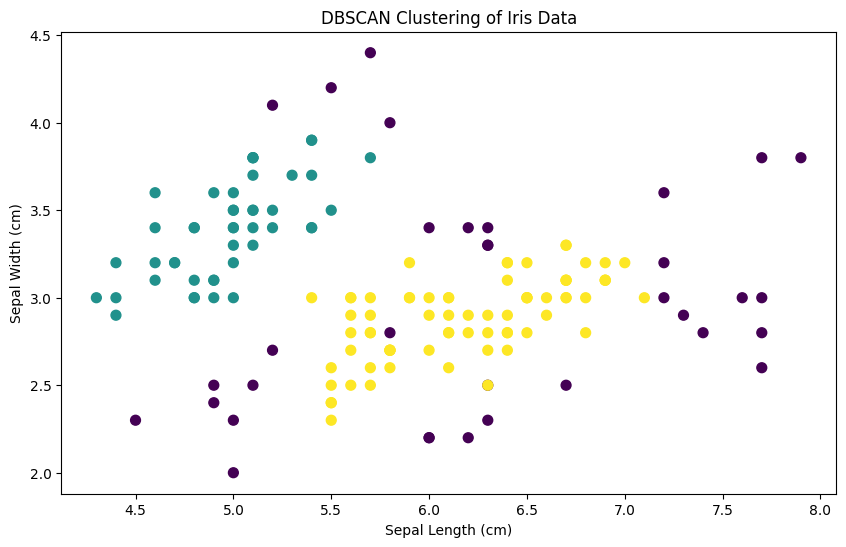

In [14]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Calculate new silhouette score
new_score = silhouette_score(scaled_data, dbscan_labels)

# Display the new silhouette score
print(f'New Silhouette Score with DBSCAN: {new_score:.2f}')

# Visualizing the DBSCAN clustering results
plt.figure(figsize=(10, 6))
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering of Iris Data')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

With the new Silhouette Score of 0.36 using DBSCAN, it appears that this approach did not improve the clustering performance compared to the original K-means algorithm, which achieved a score of 0.48. This indicates that for this particular dataset, K-means provided a more effective method for identifying distinct clusters based on the data distribution.

## Conclusion
In this analysis, we explored the application of unsupervised learning techniques, specifically K-means and DBSCAN clustering, to the Iris dataset. The primary goal was to segment the data into meaningful clusters without the use of pre-labeled target data.

K-means Clustering: Identified a moderate separation among clusters with a Silhouette Score of 0.48. This score suggests that while there is some distinction between the clusters, there might be overlapping or the clusters are not extremely distinct. The optimal number of clusters, determined by the Elbow method, was three, which aligns with the biological species categorization in the Iris dataset.

DBSCAN Clustering: Did not perform as well, yielding a Silhouette Score of 0.36. This lower score indicates less effective clustering with more overlap or less clear boundaries between clusters. DBSCAN's sensitivity to its parameters (eps and min_samples) might require further tuning to potentially achieve better results.

Improvements?

Parameter Tuning for K-means: Experiment with different initialization methods or a more refined range of k to potentially enhance the clustering results.

Explore Alternative Clustering Algorithms: Further investigation with other algorithms like Agglomerative Hierarchical Clustering or exploring more advanced methods of density-based clustering could provide different insights.

Feature Engineering and Dimensionality Reduction: Applying techniques such as Principal Component Analysis (PCA) to reduce dimensionality could reveal underlying patterns that are not apparent in the higher-dimensional space.

Domain-Specific Insights: Incorporating domain expertise to understand and interpret the clusters better can provide more actionable insights, especially in fields like biology where the clusters might correspond to specific species or types.